# Hypothesis Testing

> **_Statistical Inference:_** the theory, methods and practice of forming judgments about the parameters of a population and the reliability of statistical relationships, typically on the basis of random sampling

A **population** is a set of similar items or events which is of interest for some question or experiment. It is generally difficult or impossible to sample from the entire population so we rely on **random sampling** techniques to ensure that our sample is a good representation of the population.

### Application of Statistical Inference

* **Hypothesis Testing:** How well does the data match some assumed (null) distribution?
* **Point Estimation:** What instance of some distributional class does it match well?
* **Uncertainty Estimation:** How can we quantify our degree of uncertainty about our estimates?
* **Sensitivity Analysis:** Do our results rely heavily on our distributional assumptions?

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
def infer_gaussian_from_beta(a, b):
    """
    takes the alpha (a) and beta (b) parameters form a beta distribution
    produces a plot with both the original and the inferred
    """
    
    # plot the beta
    fig = plt.figure(figsize=(8, 6), facecolor="white")
    ax = fig.add_subplot(111)
    beta_dist = stats.beta(a, b)
    beta_rvs = beta_dist.rvs(size=2000)
    pdf_range = np.linspace(beta_dist.ppf(0.0001), beta_dist.ppf(0.9999), 100)
    ax.hist(beta_rvs, bins=60, facecolor="royalblue", alpha=0.7, density=1, histtype="stepfilled")
    ax.plot(pdf_range, beta_dist.pdf(pdf_range), "darkorange", lw=3, label="Beta")
    
    ## inference
    mu_hat, sigma_hat = stats.norm.fit(beta_rvs)
    
    ## plot inferred pdf
    norm_dist = stats.norm(loc=mu_hat, scale=sigma_hat)
    norm_rvs = norm_dist.rvs(size=1000)
    pdf_range = np.linspace(norm_dist.ppf(0.0001), norm_dist.ppf(0.9999), 100)
    ax.plot(pdf_range, norm_dist.pdf(pdf_range), color="black", linestyle="dashed", lw=3, label="Gaussian")
    ax.set_aspect(1./ax.get_data_ratio())
    ax.set_xlim((-.1, 1.1))
    ax.legend(loc="upper left")
    
    ## annotate the axis
    text = r"$\alpha$=%s, $\beta$=%s"%(a,b) + "\n"
    text += r"$\hat{\mu}$=%s, $\hat{\sigma}$=%s"%(round(mu_hat, 2), round(sigma_hat, 2))
    ax.annotate(text, xy=(0.01, 0.7), xycoords="axes fraction", 
                xytext=(0.02, 0.68), textcoords="axes fraction", 
                bbox=dict(boxstyle="round", fc="0.8"))
    
    return norm_dist, beta_dist

Estimated Probability: 0.319
True Probability:0.41


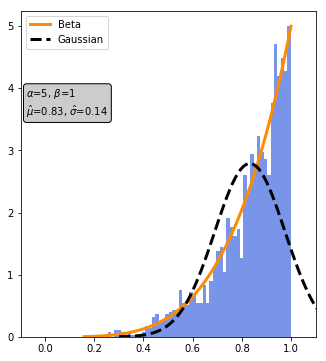

In [3]:
norm_dist, beta_dist = infer_gaussian_from_beta(5, 1) # (5,1), (5,2), (5,5)

# what is the probability that more than 90% of processors are being used at any one time?
print("Estimated Probability: {}".format(round(1 - norm_dist.cdf(0.90), 3)))
print("True Probability:{}".format(round(1 - beta_dist.cdf(0.90), 3)))

Estimated Probability: 0.124
True Probability:0.114


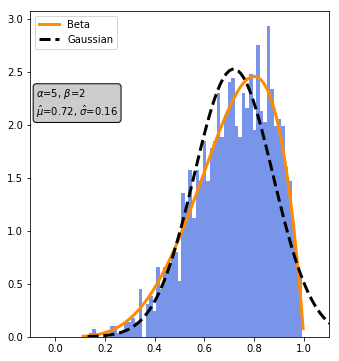

In [4]:
norm_dist, beta_dist = infer_gaussian_from_beta(5, 2) # (5,1), (5,2), (5,5)

# what is the probability that more than 90% of processors are being used at any one time?
print("Estimated Probability: {}".format(round(1 - norm_dist.cdf(0.90), 3)))
print("True Probability:{}".format(round(1 - beta_dist.cdf(0.90), 3)))

Estimated Probability: 0.003
True Probability:0.001


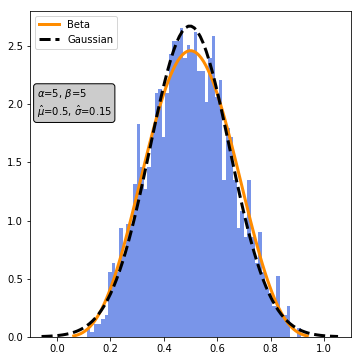

In [5]:
norm_dist, beta_dist = infer_gaussian_from_beta(5, 5) # (5,1), (5,2), (5,5)

# what is the probability that more than 90% of processors are being used at any one time?
print("Estimated Probability: {}".format(round(1 - norm_dist.cdf(0.90), 3)))
print("True Probability:{}".format(round(1 - beta_dist.cdf(0.90), 3)))

### Algorithms

* **Numerical Optimization**
    * Maximum Likelihood
    * Expectation Maximization (EM)
* **Simulation**
    * Bootstrapping
    * Permutation Testing
    * Monte Carlo Methods
* **Estimation of Posterior Distributions**
    * Markov Chain Monte Carlo (MCMC)
    * Variational Methods
* **Nonparametric Estimation**
    * Bayesian Non-parametrics

# Case Study

> *Visitors to the AAVAIL website are randomly sent to version A or version B of the website. Let's assume that version B has a new marketing scheme for getting a user to click "subscribe" and version A is the default version. In order to investigate whether version B has a greater impact on purchase decisions we will track the number of visitors to each version and keep track of the proportion that convert to becoming subscribers*

### Basic Process

1. **Pose your question:**
    * Do visitors to sites A and B convert (i.e. become subscribers) at different rates?
2. **Specify a null $H_0$ and alternative $H_1$ hypotheses**
    * $H_0$ The conversion rate is the same between sites A and B
    * $H_1$ The conversion rate is different between sites A and B
3. **Choose a specific hypothesis test adn level of significance**
    * Binomial Test, $\alpha=0.05$
4. **Collect data**
    * Track visitors to site a specified period of time, randomly sending each to either A or B
5. **Run the test**
    * Calculate the test statistic and determine a $p-value$
6. **Evaluate the results**
    * You will fail to reject the null hypothesis and you will reject it in favor of the alternative

In [6]:
def simulate_data(n, p):
    """
    The probability of success in a single trial follows a Bernoulli distribution.
    We can simulate visitors to the site by running repeated Bernoulli trials.
    """
    
    results = stats.bernoulli(p).rvs(n)
    converts = np.sum(results)
    print("We observed {} conversions out of {} visitors".format(converts, n))
    return results
    
p_a = 0.12 # the long term conversion rate for website A
p_b = 0.20 # the "unknown" conversion rate for website B

np.random.seed(42)
results = simulate_data(100, p_b)

We observed 18 conversions out of 100 visitors


In [7]:
## run the binomial test
baseline_probability = p_a
p_value = stats.binom_test(np.sum(results), n=results.size, p=baseline_probability)
print("binomial test p-value: {}".format(round(p_value, 4)))

binomial test p-value: 0.0878


In [8]:
## expected distribution
expected_dist = stats.binom(n=results.size, p=p_a)
mu = expected_dist.mean()
sd = expected_dist.std()
print("The expected distribution the site is mu={}, sd={}".format(mu, round(sd, 3)))

The expected distribution the site is mu=12.0, sd=3.25


In [9]:
## one sample Z-test from difference in proportions
expected_dist = stats.binom(n=results.size, p=p_a)
p0 = expected_dist.mean()
sd = expected_dist.std()
z = (np.sum(results) - 0.5 - p0) / sd
pvalue = 2 * (1 - stats.norm.cdf(z))
print("normal approximation p-value: {}".format(round(pvalue, 3)))

normal approximation p-value: 0.091


In [10]:
## permutation test
nsamples = 100000
n = results.size
p = p_a
print("n={}, p={}".format(n, p))
xs = np.random.binomial(n, p, nsamples)
p_value = 2 * np.sum(xs >= np.sum(results)) / xs.size
print("simulation p-value: {}".format(round(p_value, 3)))

n=100, p=0.12
simulation p-value: 0.1


In [11]:
## Maximum likelihood estimation
bs_samples = np.random.choice(results, (nsamples, len(results)), replace=True)
bs_ps = np.mean(bs_samples, axis=1)
bs_ps.sort()

print("Maximum Likelihood Estimate: {}".format(np.sum(results)/float(len(results))))
print("Bootstrap CI: ({}, {})".format(bs_ps[int(0.025*nsamples)], bs_ps[int(0.975*nsamples)]))

Maximum Likelihood Estimate: 0.18
Bootstrap CI: (0.11, 0.26)


In [12]:
def bayes_one_sample_proportions(p_a, p_b, n=100):
    """
    use the conjugate prior to estimate posterior
    """
    
    fig = plt.figure(figsize=(10, 4), facecolor="white")
    ax = fig.add_subplot(111)
    
    np.random.seed(42)
    results = simulate_data(n, p_b)
    
    expected_dist = stats.binom(n=results.size, p=p_a)
    mu = expected_dist.mean()
    sd = expected_dist.std()
    print(r"Given the baseline we expected on average {} conversions".format(int(mu)))
    p_value = stats.binom_test(np.sum(results), n=results.size, p=p_a)
    print("binomial test p-value: {}".format(round(p_value, 4)))
    
    converts = np.sum(results)
    a, b = 1, 1
    prior = stats.beta(a, b)
    post = stats.beta(converts+a, n-converts+b)
    ci = post.interval(0.95)
    map_ = (converts+a-1.0)/(n+a+b-2.0)
    
    xs = np.linspace(0, 1, n)
    ax.plot(prior.pdf(xs), label="Prior")
    ax.plot(post.pdf(xs), label="Posterior")
    
    maxval = (0.05 * post.pdf(xs).max()) + post.pdf(xs).max()
    linerange = np.linspace(0, maxval, 100)
    ci_range = np.linspace(ci[0], ci[1], 100)
    ax.plot(ci_range*n, [0.05*maxval]*100, c="black", linewidth=2, label="95% CI")
    ax.plot([n*p_a]*100, linerange, c="darkred", linestyle="solid", linewidth=5, alpha=0.5, label=r"$p_{a}$")
    ax.plot([n*p_b]*100, linerange, c="gold", linestyle="solid", linewidth=5, alpha=0.5, label=r"$p_{b}$")
    ax.plot([n*map_]*100, linerange, c="royalblue", linestyle="dashed", alpha=0.9, label=r"$\hat{p_{b}}$")
    ax.set_ylim((0, maxval))
    ax.legend()
    

Is the conversion rate of B different from A?

We observed 18 conversions out of 100 visitors
Given the baseline we expected on average 12 conversions
binomial test p-value: 0.0878


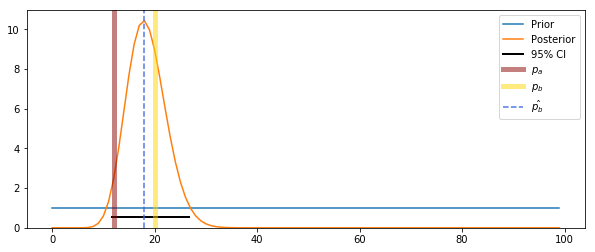

In [13]:
p_a = 0.12 # the long term conversion rate for website A
p_b = 0.20 # the "unknown" conversion rate for website B
bayes_one_sample_proportions(p_a, p_b, n=100)

With more data the estimated $\hat{p_{b}}$ and actual $p_{b}$ probabilities will converge

We observed 106 conversions out of 500 visitors
Given the baseline we expected on average 60 conversions
binomial test p-value: 0.0


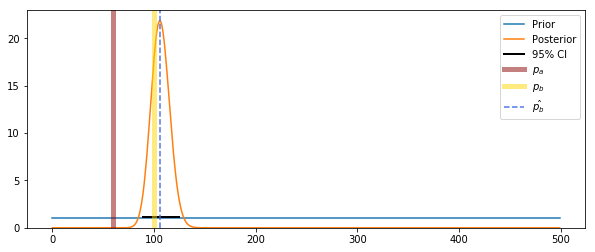

In [14]:
p_a = 0.12 # the long term conversion rate for website A
p_b = 0.20 # the "unknown" conversion rate for website B
bayes_one_sample_proportions(p_a, p_b, n=500)

We observed 199 conversions out of 1000 visitors
Given the baseline we expected on average 120 conversions
binomial test p-value: 0.0


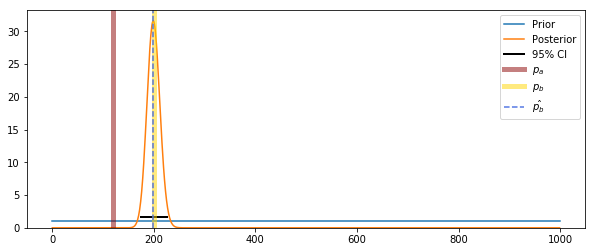

In [15]:
p_a = 0.12 # the long term conversion rate for website A
p_b = 0.20 # the "unknown" conversion rate for website B
bayes_one_sample_proportions(p_a, p_b, n=1000)

We can confidently say that there is a difference between A and B

# Two-sample independent t-test

In this example we are interested in comparing the amount of time elapsed between a client request and stream availability for the company AAVAIL’s streaming servers. Specifically we want to compare our locally hosted servers to a cloud service in terms of speed. The data are arrival times (in seconds) for a stream, meaning the time it takes from submission to receive a link with the modified version of the stream.

Remember to formalize your hypothesis.

1. Pose your **question** - *Is it faster, on average, to process streams for viewing on a cloud service compared to our locally hosted servers?*

2. Find the relevant **population** - *The population consists of all possible streams*

3. Specify a **null hypothesis** - *There is no difference, on average, between local and hosted services for stream processing times location after I submit my ride request.*

4. Select the test and the significance level, two-sample independent t-test with $\alpha=0.05$

Then you will collect your data, calculate the test statistic and evaluate for significance.

In [16]:
local_arrivals = np.array([3.99, 4.15, 6.88, 4.53, 5.65, 6.75, 7.13, 2.79, 6.20,
                           3.72, 7.28, 5.23, 4.72, 1.04, 4.25, 4.71, 2.16, 3.46,
                           3.41, 7.98, 0.75, 3.64, 6.25, 6.86, 4.71])
hosted_arrivals = np.array([5.82, 4.83, 7.19, 6.98, 5.82, 5.25, 5.71, 5.59, 7.93,
                            7.09, 6.37, 6.31, 6.28, 3.12, 6.02, 4.84, 4.16, 6.72,
                            7.44, 6.28, 7.37, 4.27, 6.15, 4.88, 7.78])

In [17]:
test_statistic, pvalue = stats.ttest_ind(local_arrivals, hosted_arrivals)
print("p-value: {}".format(round(pvalue,5)))

p-value: 0.0069


In this case we would reject the **null hypothesis** in favor of the alternative that the average times are not the same.

# Unequal variances t-test

The t-distribution always has mean 0 and variance 1, and has one parameter, the degrees of freedom. Smaller degrees of freedom have heavier tails, with the distribution becoming more and more normal as the degrees of freedom gets larger.

The default version of t-test assumes that the sample sizes and variances of your two samples are equal. In the case of our arrival times above we cannot state that the variances of the two samples are suppose to be the same. The unequal variances t-test, is a more appropriate variant of the t-test for this example.

In [18]:
test_statistic, pvalue = stats.ttest_ind(local_arrivals, hosted_arrivals, equal_var = False)
print("p-value: {}".format(round(pvalue,5)))

p-value: 0.00735


# One-way Analysis of Variance (ANOVA)

The previous scenarios have been concerned with distinguishing between a sample and a baseline, and between two samples. Suppose you want to distinguish between three or more samples, that is your data fall into three-plus categories and you want to establish whether there is a difference in outcomes based on those categories.

If AAVAIL wanted to run the performance tests from the previous example comparing several cloud providers and several architectures then an ANOVA would be more appropriate here.

In [19]:
import numpy as np
from scipy import stats

local_arrivals = np.array([3.99, 4.15, 7.88, 4.53, 5.65, 6.75, 7.13, 3.79, 6.20,
                           3.72, 7.28, 5.23, 4.72, 2.04, 4.25, 4.71, 3.16, 3.46,
                           3.41, 7.98, 0.75, 3.64, 6.25, 6.86, 4.71])
cloud1_arrivals = np.array([5.82, 4.83, 7.19, 6.98, 5.82, 5.25, 5.71, 5.59, 6.93,
                            7.09, 6.37, 6.31, 6.28, 3.12, 6.02, 4.84, 4.16, 6.72,
                            7.44, 6.28, 6.37, 4.27, 6.15, 4.88, 6.78])
cloud2_arrivals = np.array([5.73, 4.95, 6.96, 6.12, 5.85, 6.74, 5.19, 7.24,
                            6.08, 6.11, 6.11, 7.68, 4.66, 6.12, 5.04, 4.19, 6.46,
                            7.02, 7.28, 6.19, 4.67, 7.15, 4.58, 6.01])

In [20]:
all_arrivals = [local_arrivals, cloud1_arrivals, cloud2_arrivals]
global_mean = np.hstack(all_arrivals).mean()

print("The global mean arrival time is: %s"%np.round(global_mean, decimals=2))

for name, arrivals in zip(['local', 'cloud1', 'cloud2'], all_arrivals):
    print("Mean arrival time for {} is {}".format(name, np.round(arrivals.mean(), decimals=2)))

The global mean arrival time is: 5.59
Mean arrival time for local is 4.89
Mean arrival time for cloud1 is 5.89
Mean arrival time for cloud2 is 6.01


When comparing across three or more groups an appropriate test is a **one-way ANOVA**, which compares between group variation and within group variation. The relevant probability distribution iS the F distribution, and that is the name used in the relevant method in Scipy:

In [21]:
test_statistic, pvalue = stats.f_oneway(*all_arrivals)
print(np.round(pvalue,decimals=4))

0.0082


In this example, it seems likely that there is at least one difference between the groups. 

# *p-Value* Limitations

A *p-value* is the probability of finding the observed, or more extreme, results when the null hypothesis (H-zero) of a study question is true.

In other words it is a tool to quantify the evidence against the null hypothesis. The null hypothesis is rejected when this evidence is under some predefined, but arbitrarily defined threshold. It turns out there are many ways to modify the data get the value under the threshold.

* If we re-run the experiment multiple times changing the features until we arrive at the best p-value
* If we go back and collect a few more samples to get the p-value just over the threshold
* If we remove one or more outliers to ensure that the p-value is smaller
* If we set the level of alpha after the hypothesis has been tested

In the A/B testing example with two different versions of a website, we used different p-values as an investigative tool, not as specific number to base decisions on or draw conclusions from. We also showed another powerful tool that does not use p-values at all, that is the *posterior distribution*. The degree of belief for that experiment was quantified as the posterior distribution, which is a far more informative tool for decision making than the p-value itself.

The important thing to remember is that p-values themselves are not a source of ground truth, but they are nonetheless quite useful if used appropriately. If the testing of a specific model is business critical then it might be worth taking the time to test the ideas within a Bayesian framework. This can give you more confidence in your conclusions for a given experiment, but whether it is Bayesian or frequentist treatment of the experiment the study still needs to be repeated with newly collected data to ensure **reproducibility** (refer to the module *scientific thinking*).

# Multiple Testing

It was mentioned in the p-value limitations unit that running more than one test at a time, on the same data is an example of p-value hacking. This is because there is an expected false positive rate for running one test, and if we run multiple tests say using different combinations of features this expected rate should be higher.

The `fdr_bh` method is a commonly used method. The p-values are ranked, multiplied by the number of features, and divided by their corresponding rank. It is another form of p-value adjustment.

In [22]:
import numpy as np
from statsmodels.stats.multitest import multipletests

pvals = np.random.uniform(0.001, 0.06, 12)

_results = multipletests(pvals, alpha=0.05, method='bonferroni', is_sorted=False, returnsorted=False)
rejected_bonferroni, adjusted_bonferroni = _results[0],_results[1]

_results = multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
rejected_bh, adjusted_bh = _results[0],_results[1]

for p, pval in enumerate(pvals):
     print(round(pval,3),round(adjusted_bonferroni[p],3),round(adjusted_bh[p],3))

0.012 0.143 0.057
0.033 0.396 0.057
0.053 0.63 0.057
0.044 0.53 0.057
0.049 0.583 0.057
0.04 0.478 0.057
0.042 0.502 0.057
0.051 0.613 0.057
0.016 0.189 0.057
0.03 0.359 0.057
0.014 0.169 0.057
0.059 0.711 0.059
